In [1]:
# Import Libraries and define functions
import csv
from re import M
from tkinter import font
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# plt.rcParams.update({
#     # "figure.figsize": [5, 5],  # width, height in inches
#     "font.size": MEDIUM_SIZE,  # default text sizes
#     # "axes": SMALL_SIZE,       # fontsize of the axes title
#     # "axes": MEDIUM_SIZE,      # fontsize of the x and y labels
#     # "xtick": SMALL_SIZE,      # fontsize of the tick labels
#     # "ytick": SMALL_SIZE,      # fontsize of the tick labels
#     # "legend": MEDIUM_SIZE,    # legend fontsize
#     # "figure": LARGE_SIZE,      # fontsize of the figure title
# })

#plt.rc('pdf', use14corefonts=True)
# plt.rc('text', usetex=True)

# plt.rc('text', usetex=True)
# plt.rc('pdf',fonttype=42)
# plt.rc('font',family="Times New Roman")

mpl.rcParams['text.usetex'] = True

colors = ["#648FFF", "#DC267F", "#FE6100", "#785EF0", "#009E73"]

def set_style(ax):
    ax.minorticks_on()
    ax.grid(visible=True, which="major", color="gray", linestyle="-", alpha=0.4)
    ax.autoscale(enable=True, axis='y', tight=True)

    #ax.set_facecolor("#EAEAF2")
    
    # ax.style.use("ggplot")

    # ax.legend(loc="upper left")
    # ax.setp(plt.gca().lines, linewidth=1.2)
    # legend = plt.gca().legend(
    #     # bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    #     loc="upper left",
    #     fontsize=MEDIUM_SIZE,
    #     # ncol=2,
    #     # mode="expand",
    #     # borderaxespad=0.0,
    #     # frameon=1,
    # )
    # frame = legend.get_frame()
    # frame.set_facecolor("white")
    # frame.set_edgecolor("white")


def read_file(path):
    with open(path, "r") as fd:
        cwriter = csv.reader(fd)
        data = []
        skipped_first_row = False
        for row in cwriter:
            if not skipped_first_row:
                skipped_first_row = True
                continue
            row_tmp = row
            for idx in range(len(row_tmp)):
                row_tmp[idx] = float(row_tmp[idx])
            data.append(row_tmp)
    return data


def plot_dual_comparison(ax, mean_data, min_data, max_data, colors, labels, x_label="Episode", y_label="Cum. Ep. Reward", sizes=[20, 22, 24]):
    """
    Plot the data using the mean as a line and the min-max ranges as a shaded area for a baseline and a new method

    Parameters
    ----------
    `mean_data` -> the mean data to plot, where mean_data[0] is the baseline and mean_data[1] is the new method
    `min_data` -> the min data to plot, where min_data[0] is the baseline and min_data[1] is the new method
    `max_data` -> the max data to plot, where max_data[0] is the baseline and max_data[1] is the new method
    `colors` -> the colors to use for the plot, where colors[0] is the baseline and colors[1] is the new method
    `labels` -> the label to use for the legend, where labels[0] is the baseline and labels[1] is the new method
    `x_label` -> the label to use for the x-axis
    `y_label` -> the label to use for the y-axis
    `sizes` -> the sizes to use for the plot, a list of 3 elements: small, medium and large size
    """

    x = np.arange(1, len(mean_data[0]) + 1)

    for i in range(len(mean_data)):
        ax.plot(x, mean_data[i], color=colors[i], linewidth=2.0, label=labels[i])
        ax.fill_between(x, min_data[i], max_data[i], facecolor=colors[i], alpha=0.2)
        
    ax.set_xlabel(x_label, fontsize=sizes[1])
    ax.set_ylabel(y_label, fontsize=sizes[1])

    set_style(ax)

In [2]:
from scipy.signal import savgol_filter

def savitzky_golay_smooth(data, window_length=50, polyorder=2):
    return savgol_filter(data, window_length=window_length, polyorder=polyorder)

def moving_average_smooth(data, window_length=50):
    return np.convolve(data, np.ones(window_length), "valid") / window_length

In [3]:
# %matplotlib

In [4]:
# smooth_fn = moving_average_smooth
# smooth_args = {"window_length": 70}
def no_smooth(data, **_):
    return data

smooth_fn = savitzky_golay_smooth
humanoid_smooth_args = {"window_length": 80, "polyorder": 2}
halfcheetah_smooth_args = {"window_length": 10, "polyorder": 2}
seghalfcheetah_smooth_args = {"window_length": 20, "polyorder": 2}

humanoid_path = "data/experiments/humanoid.csv"
humanoid_data = np.array(read_file(humanoid_path))
humanoid_cutoff_episode = 8000
humanoid_data = humanoid_data[:humanoid_cutoff_episode]
humanoid_mean_data = np.array(
    [smooth_fn(humanoid_data[:, 1], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 4], **humanoid_smooth_args)]
)
humanoid_min_data = np.array(
    [smooth_fn(humanoid_data[:, 2], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 5], **humanoid_smooth_args)]
)
humanoid_max_data = np.array(
    [smooth_fn(humanoid_data[:, 3], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 6], **humanoid_smooth_args)]
)

halfcheetah_path = "data/experiments/halfcheetah.csv"
halfcheetah_data = np.array(read_file(halfcheetah_path))
halfcheetah_cutoff_episode = 900
halfcheetah_data = halfcheetah_data[:halfcheetah_cutoff_episode]
halfcheetah_mean_data = np.array(
    [smooth_fn(halfcheetah_data[:, 1], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 4], **halfcheetah_smooth_args)]
)
halfcheetah_min_data = np.array(
    [smooth_fn(halfcheetah_data[:, 2], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 5], **halfcheetah_smooth_args)]
)
halfcheetah_max_data = np.array(
    [smooth_fn(halfcheetah_data[:, 3], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 6], **halfcheetah_smooth_args)]
)

seghalfcheetah_path = "data/experiments/2seghalfcheetah.csv"
seghalfcheetah_data = np.array(read_file(seghalfcheetah_path))
seghalfcheetah_cutoff_episode = 1500
seghalfcheetah_data = seghalfcheetah_data[:seghalfcheetah_cutoff_episode]
seghalfcheetah_mean_data = np.array(
    [smooth_fn(seghalfcheetah_data[:, 4], **seghalfcheetah_smooth_args), smooth_fn(seghalfcheetah_data[:, 1], **seghalfcheetah_smooth_args)]
)
seghalfcheetah_min_data = np.array(
    [smooth_fn(seghalfcheetah_data[:, 5], **seghalfcheetah_smooth_args), smooth_fn(seghalfcheetah_data[:, 2], **seghalfcheetah_smooth_args)]
)
seghalfcheetah_max_data = np.array(
    [smooth_fn(seghalfcheetah_data[:, 6], **seghalfcheetah_smooth_args), smooth_fn(seghalfcheetah_data[:, 3], **seghalfcheetah_smooth_args)]
)

## Comparison plots

In [7]:
labels = ["Co-Adaptation ($r^{\operatorname{RL}}$ only)", "CoSIL"]
no_labels = ["_nolegend_", "_nolegend_"]
sizes = [20, 22, 24]
plt.rc('xtick', labelsize=sizes[0])
plt.rc('ytick', labelsize=sizes[0])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.5, 12)) 

plot_dual_comparison(ax1, seghalfcheetah_mean_data, seghalfcheetah_min_data, seghalfcheetah_max_data, colors, labels, sizes=sizes)
ax1.set_title("2SegHalfCheetah", fontsize=sizes[2])

plot_dual_comparison(ax2, halfcheetah_mean_data, halfcheetah_min_data, halfcheetah_max_data, colors, no_labels, sizes=sizes)
ax2.set_title("3SegHalfCheetah", fontsize=sizes[2])

plot_dual_comparison(ax3, humanoid_mean_data, humanoid_min_data, humanoid_max_data, colors, no_labels, sizes=sizes)
ax3.set_title("Humanoid", fontsize=sizes[2])

legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

plt.tight_layout()
plt.show()

# fig.savefig("data/plots/baseline_cosil_comparison_vertical.pdf", bbox_inches='tight')

RuntimeError: latex was not able to process the following string:
b'Co-Adaptation ($r^{\\\\operatorname{RL}}$ only)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp9itt1fmj 175f57f5c926816dc14711859725d862.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./175f57f5c926816dc14711859725d862.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 175f57f5c926816dc14711859725d862.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.29 {\sffamily Co-Adaptation ($r^{\operatorname
                                                {RL}}$ only)}%
No pages of output.
Transcript written on tmp9itt1fmj/175f57f5c926816dc14711859725d862.log.




<Figure size 750x1200 with 3 Axes>

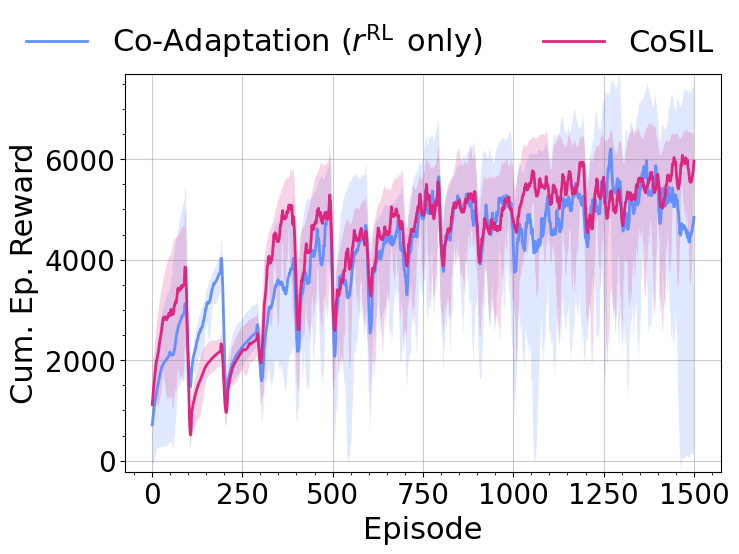

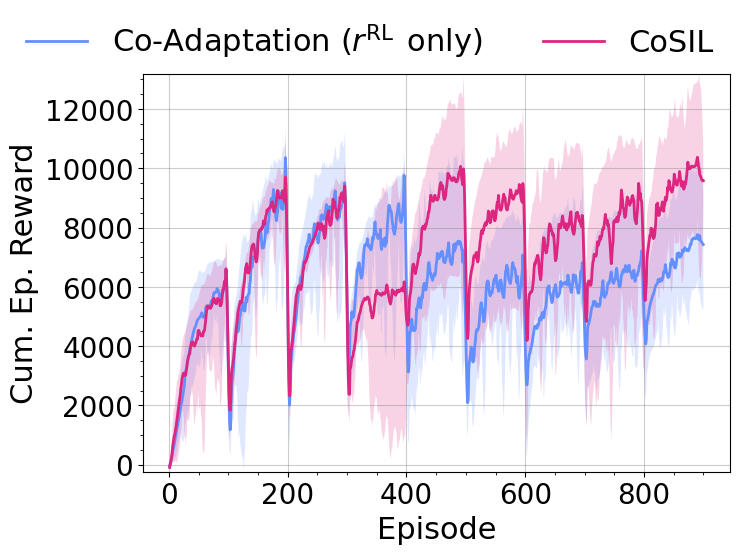

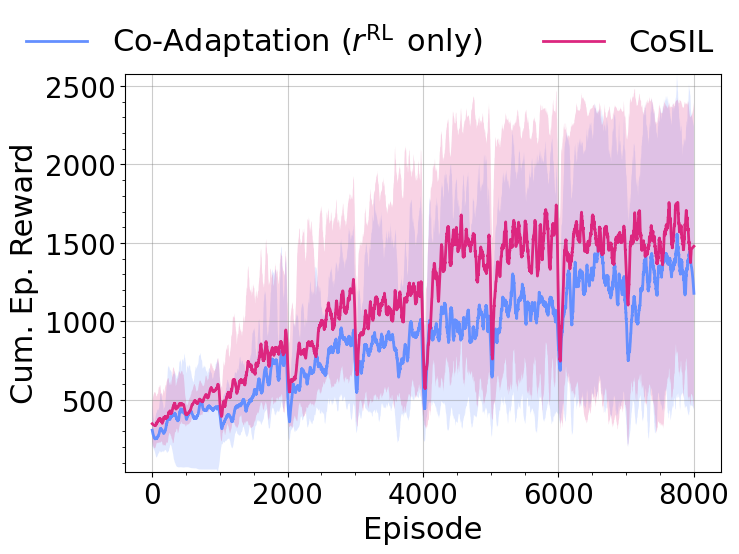

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, seghalfcheetah_mean_data, seghalfcheetah_min_data, seghalfcheetah_max_data, colors, labels, sizes=sizes)
#ax.set_title("2SegHalfCheetah", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_comparison_2seghalfcheetah.pdf", bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, halfcheetah_mean_data, halfcheetah_min_data, halfcheetah_max_data, colors, labels, sizes=sizes)
#ax.set_title("3SegHalfCheetah", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_comparison_3seghalfcheetah.pdf", bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, humanoid_mean_data, humanoid_min_data, humanoid_max_data, colors, labels, sizes=sizes)
#ax.set_title("Humanoid", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_comparison_humanoid.pdf", bbox_inches='tight')

plt.tight_layout()
plt.show()

In [ ]:
smooth_fn = savitzky_golay_smooth
humanoid_smooth_args = {"window_length": 200, "polyorder": 2}
halfcheetah_smooth_args = {"window_length": 25, "polyorder": 2}
seghalfcheetah_smooth_args = {"window_length": 50, "polyorder": 2}

humanoid_mean_data = np.array(
    [smooth_fn(humanoid_data[:, 1], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 4], **humanoid_smooth_args)]
)
humanoid_min_data = np.array(
    [smooth_fn(humanoid_data[:, 2], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 5], **humanoid_smooth_args)]
)
humanoid_max_data = np.array(
    [smooth_fn(humanoid_data[:, 3], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 6], **humanoid_smooth_args)]
)

halfcheetah_mean_data = np.array(
    [smooth_fn(halfcheetah_data[:, 1], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 4], **halfcheetah_smooth_args)]
)
halfcheetah_min_data = np.array(
    [smooth_fn(halfcheetah_data[:, 2], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 5], **halfcheetah_smooth_args)]
)
halfcheetah_max_data = np.array(
    [smooth_fn(halfcheetah_data[:, 3], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 6], **halfcheetah_smooth_args)]
)

seghalfcheetah_mean_data = np.array(
    [smooth_fn(seghalfcheetah_data[:, 4], **seghalfcheetah_smooth_args), smooth_fn(seghalfcheetah_data[:, 1], **seghalfcheetah_smooth_args)]
)
seghalfcheetah_min_data = np.array(
    [smooth_fn(seghalfcheetah_data[:, 5], **seghalfcheetah_smooth_args), smooth_fn(seghalfcheetah_data[:, 2], **seghalfcheetah_smooth_args)]
)
seghalfcheetah_max_data = np.array(
    [smooth_fn(seghalfcheetah_data[:, 6], **seghalfcheetah_smooth_args), smooth_fn(seghalfcheetah_data[:, 3], **seghalfcheetah_smooth_args)]
)

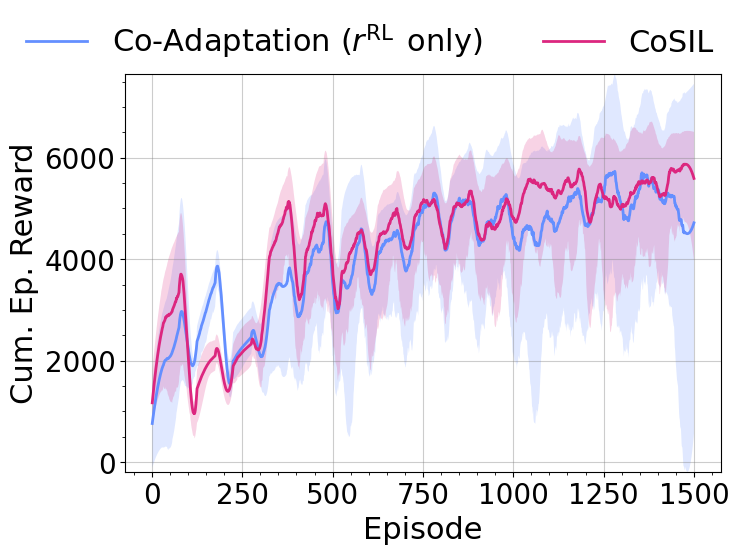

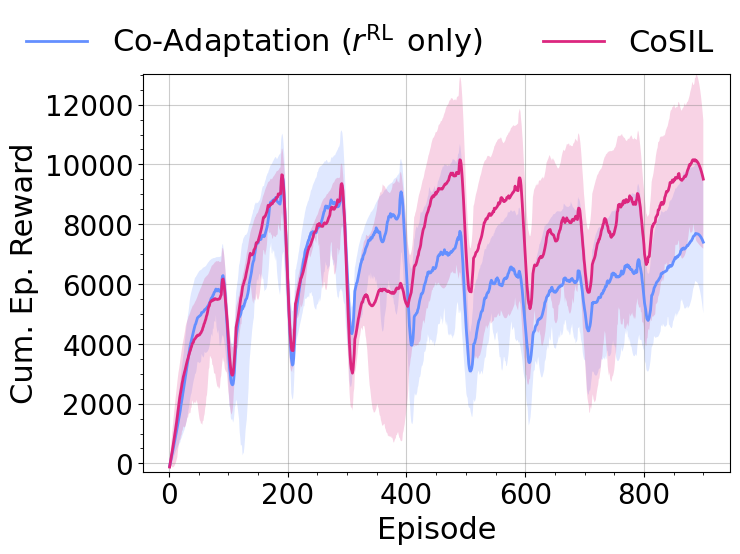

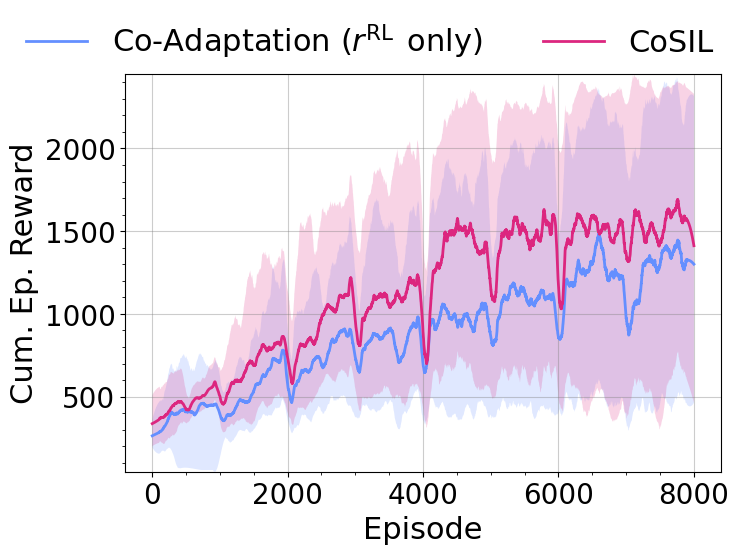

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, seghalfcheetah_mean_data, seghalfcheetah_min_data, seghalfcheetah_max_data, colors, labels, sizes=sizes)
#ax.set_title("2SegHalfCheetah", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_comparison_2seghalfcheetah_smoothed.pdf", bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, halfcheetah_mean_data, halfcheetah_min_data, halfcheetah_max_data, colors, labels, sizes=sizes)
#ax.set_title("3SegHalfCheetah", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_comparison_3seghalfcheetah_smoothed.pdf", bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, humanoid_mean_data, humanoid_min_data, humanoid_max_data, colors, labels, sizes=sizes)
#ax.set_title("Humanoid", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_comparison_humanoid_smoothed.pdf", bbox_inches='tight')

plt.tight_layout()
plt.show()

## Best 10% comparison plots

In [ ]:
# Select only the top_per% best performing episodes for each morphology (in terms of mean reward) for each method

top_per = 0.3

humanoid_episodes_per_morph = 1000
halfcheetah_episodes_per_morph = 100
seghalfcheetah_episodes_per_morph = 100
humanoid_k = int(top_per * humanoid_episodes_per_morph)
halfcheetah_k = int(top_per * halfcheetah_episodes_per_morph)
seghalfcheetah_k = int(top_per * seghalfcheetah_episodes_per_morph)

humanoid_baseline_mean_data = humanoid_data[:, 1]
humanoid_cosil_mean_data = humanoid_data[:, 4]
humanoid_baseline_min_data = humanoid_data[:, 2]
humanoid_cosil_min_data = humanoid_data[:, 5]
humanoid_baseline_max_data = humanoid_data[:, 3]
humanoid_cosil_max_data = humanoid_data[:, 6]
humanoid_topk_mean_data = np.zeros((2, humanoid_k * (humanoid_cutoff_episode // humanoid_episodes_per_morph)))
humanoid_topk_min_data = np.zeros((2, humanoid_k * (humanoid_cutoff_episode // humanoid_episodes_per_morph)))
humanoid_topk_max_data = np.zeros((2, humanoid_k * (humanoid_cutoff_episode // humanoid_episodes_per_morph)))

i = 0
while i * humanoid_episodes_per_morph < humanoid_cutoff_episode:
    i_episode = i * humanoid_episodes_per_morph

    topk_idxs_baseline = np.argsort(humanoid_baseline_mean_data[i_episode:i_episode+humanoid_episodes_per_morph])[-humanoid_k:]
    topk_idxs_cosil = np.argsort(humanoid_cosil_mean_data[i_episode:i_episode+humanoid_episodes_per_morph])[-humanoid_k:]

    humanoid_topk_mean_data[0, i*humanoid_k:(i+1)*humanoid_k] = humanoid_baseline_mean_data[i_episode:i_episode+humanoid_episodes_per_morph][topk_idxs_baseline]
    humanoid_topk_mean_data[1, i*humanoid_k:(i+1)*humanoid_k] = humanoid_cosil_mean_data[i_episode:i_episode+humanoid_episodes_per_morph][topk_idxs_cosil]
    humanoid_topk_min_data[0, i*humanoid_k:(i+1)*humanoid_k] = humanoid_baseline_min_data[i_episode:i_episode+humanoid_episodes_per_morph][topk_idxs_baseline]
    humanoid_topk_min_data[1, i*humanoid_k:(i+1)*humanoid_k] = humanoid_cosil_min_data[i_episode:i_episode+humanoid_episodes_per_morph][topk_idxs_cosil]
    humanoid_topk_max_data[0, i*humanoid_k:(i+1)*humanoid_k] = humanoid_baseline_max_data[i_episode:i_episode+humanoid_episodes_per_morph][topk_idxs_baseline]
    humanoid_topk_max_data[1, i*humanoid_k:(i+1)*humanoid_k] = humanoid_cosil_max_data[i_episode:i_episode+humanoid_episodes_per_morph][topk_idxs_cosil]

    i += 1

halfcheetah_baseline_mean_data = halfcheetah_data[:, 1]
halfcheetah_cosil_mean_data = halfcheetah_data[:, 4]
halfcheetah_baseline_min_data = halfcheetah_data[:, 2]
halfcheetah_cosil_min_data = halfcheetah_data[:, 5]
halfcheetah_baseline_max_data = halfcheetah_data[:, 3]
halfcheetah_cosil_max_data = halfcheetah_data[:, 6]
halfcheetah_topk_mean_data = np.zeros((2, halfcheetah_k * (halfcheetah_cutoff_episode // halfcheetah_episodes_per_morph)))
halfcheetah_topk_min_data = np.zeros((2, halfcheetah_k * (halfcheetah_cutoff_episode // halfcheetah_episodes_per_morph)))
halfcheetah_topk_max_data = np.zeros((2, halfcheetah_k * (halfcheetah_cutoff_episode // halfcheetah_episodes_per_morph)))

i = 0
while i * halfcheetah_episodes_per_morph < halfcheetah_cutoff_episode:
    i_episode = i * halfcheetah_episodes_per_morph

    topk_idxs_baseline = np.argsort(halfcheetah_baseline_mean_data[i_episode:i_episode+halfcheetah_episodes_per_morph])[-halfcheetah_k:]
    topk_idxs_cosil = np.argsort(halfcheetah_cosil_mean_data[i_episode:i_episode+halfcheetah_episodes_per_morph])[-halfcheetah_k:]

    halfcheetah_topk_mean_data[0, i*halfcheetah_k:(i+1)*halfcheetah_k] = halfcheetah_baseline_mean_data[i_episode:i_episode+halfcheetah_episodes_per_morph][topk_idxs_baseline]
    halfcheetah_topk_mean_data[1, i*halfcheetah_k:(i+1)*halfcheetah_k] = halfcheetah_cosil_mean_data[i_episode:i_episode+halfcheetah_episodes_per_morph][topk_idxs_cosil]
    halfcheetah_topk_min_data[0, i*halfcheetah_k:(i+1)*halfcheetah_k] = halfcheetah_baseline_min_data[i_episode:i_episode+halfcheetah_episodes_per_morph][topk_idxs_baseline]
    halfcheetah_topk_min_data[1, i*halfcheetah_k:(i+1)*halfcheetah_k] = halfcheetah_cosil_min_data[i_episode:i_episode+halfcheetah_episodes_per_morph][topk_idxs_cosil]
    halfcheetah_topk_max_data[0, i*halfcheetah_k:(i+1)*halfcheetah_k] = halfcheetah_baseline_max_data[i_episode:i_episode+halfcheetah_episodes_per_morph][topk_idxs_baseline]
    halfcheetah_topk_max_data[1, i*halfcheetah_k:(i+1)*halfcheetah_k] = halfcheetah_cosil_max_data[i_episode:i_episode+halfcheetah_episodes_per_morph][topk_idxs_cosil]

    i += 1

seghalfcheetah_baseline_mean_data = seghalfcheetah_data[:, 4]
seghalfcheetah_cosil_mean_data = seghalfcheetah_data[:, 1]
seghalfcheetah_baseline_min_data = seghalfcheetah_data[:, 5]
seghalfcheetah_cosil_min_data = seghalfcheetah_data[:, 2]
seghalfcheetah_baseline_max_data = seghalfcheetah_data[:, 6]
seghalfcheetah_cosil_max_data = seghalfcheetah_data[:, 3]
seghalfcheetah_topk_mean_data = np.zeros((2, seghalfcheetah_k * (seghalfcheetah_cutoff_episode // seghalfcheetah_episodes_per_morph)))
seghalfcheetah_topk_min_data = np.zeros((2, seghalfcheetah_k * (seghalfcheetah_cutoff_episode // seghalfcheetah_episodes_per_morph)))
seghalfcheetah_topk_max_data = np.zeros((2, seghalfcheetah_k * (seghalfcheetah_cutoff_episode // seghalfcheetah_episodes_per_morph)))

i = 0
while i * seghalfcheetah_episodes_per_morph < seghalfcheetah_cutoff_episode:
    i_episode = i * seghalfcheetah_episodes_per_morph

    topk_idxs_baseline = np.argsort(seghalfcheetah_baseline_mean_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph])[-seghalfcheetah_k:]
    topk_idxs_cosil = np.argsort(seghalfcheetah_cosil_mean_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph])[-seghalfcheetah_k:]

    seghalfcheetah_topk_mean_data[0, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k] = seghalfcheetah_baseline_mean_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph][topk_idxs_baseline]
    seghalfcheetah_topk_mean_data[1, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k] = seghalfcheetah_cosil_mean_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph][topk_idxs_cosil]
    seghalfcheetah_topk_min_data[0, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k] = seghalfcheetah_baseline_min_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph][topk_idxs_baseline]
    seghalfcheetah_topk_min_data[1, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k] = seghalfcheetah_cosil_min_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph][topk_idxs_cosil]
    seghalfcheetah_topk_max_data[0, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k] = seghalfcheetah_baseline_max_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph][topk_idxs_baseline]
    seghalfcheetah_topk_max_data[1, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k] = seghalfcheetah_cosil_max_data[i_episode:i_episode+seghalfcheetah_episodes_per_morph][topk_idxs_cosil]

    i += 1

# get mean of each top_per% best performing episode for each morphology
humanoid_morph_mean_data = np.zeros((2, humanoid_topk_mean_data.shape[1] // humanoid_k))
humanoid_morph_min_data = np.zeros((2, humanoid_topk_mean_data.shape[1] // humanoid_k))
humanoid_morph_max_data = np.zeros((2, humanoid_topk_mean_data.shape[1] // humanoid_k))
for i in range(humanoid_topk_mean_data.shape[1] // humanoid_k):
    humanoid_morph_mean_data[0, i] = np.mean(humanoid_topk_mean_data[0, i*humanoid_k:(i+1)*humanoid_k])
    humanoid_morph_mean_data[1, i] = np.mean(humanoid_topk_mean_data[1, i*humanoid_k:(i+1)*humanoid_k])
    humanoid_morph_min_data[0, i] = np.mean(humanoid_topk_min_data[0, i*humanoid_k:(i+1)*humanoid_k])
    humanoid_morph_min_data[1, i] = np.mean(humanoid_topk_min_data[1, i*humanoid_k:(i+1)*humanoid_k])
    humanoid_morph_max_data[0, i] = np.mean(humanoid_topk_max_data[0, i*humanoid_k:(i+1)*humanoid_k])
    humanoid_morph_max_data[1, i] = np.mean(humanoid_topk_max_data[1, i*humanoid_k:(i+1)*humanoid_k])

halfcheetah_morph_mean_data = np.zeros((2, halfcheetah_topk_mean_data.shape[1] // halfcheetah_k))
halfcheetah_morph_min_data = np.zeros((2, halfcheetah_topk_mean_data.shape[1] // halfcheetah_k))
halfcheetah_morph_max_data = np.zeros((2, halfcheetah_topk_mean_data.shape[1] // halfcheetah_k))
for i in range(halfcheetah_topk_mean_data.shape[1] // halfcheetah_k):
    halfcheetah_morph_mean_data[0, i] = np.mean(halfcheetah_topk_mean_data[0, i*halfcheetah_k:(i+1)*halfcheetah_k])
    halfcheetah_morph_mean_data[1, i] = np.mean(halfcheetah_topk_mean_data[1, i*halfcheetah_k:(i+1)*halfcheetah_k])
    halfcheetah_morph_min_data[0, i] = np.mean(halfcheetah_topk_min_data[0, i*halfcheetah_k:(i+1)*halfcheetah_k])
    halfcheetah_morph_min_data[1, i] = np.mean(halfcheetah_topk_min_data[1, i*halfcheetah_k:(i+1)*halfcheetah_k])
    halfcheetah_morph_max_data[0, i] = np.mean(halfcheetah_topk_max_data[0, i*halfcheetah_k:(i+1)*halfcheetah_k])
    halfcheetah_morph_max_data[1, i] = np.mean(halfcheetah_topk_max_data[1, i*halfcheetah_k:(i+1)*halfcheetah_k])

seghalfcheetah_morph_mean_data = np.zeros((2, seghalfcheetah_topk_mean_data.shape[1] // seghalfcheetah_k))
seghalfcheetah_morph_min_data = np.zeros((2, seghalfcheetah_topk_mean_data.shape[1] // seghalfcheetah_k))
seghalfcheetah_morph_max_data = np.zeros((2, seghalfcheetah_topk_mean_data.shape[1] // seghalfcheetah_k))
for i in range(seghalfcheetah_topk_mean_data.shape[1] // seghalfcheetah_k):
    seghalfcheetah_morph_mean_data[0, i] = np.mean(seghalfcheetah_topk_mean_data[0, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k])
    seghalfcheetah_morph_mean_data[1, i] = np.mean(seghalfcheetah_topk_mean_data[1, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k])
    seghalfcheetah_morph_min_data[0, i] = np.mean(seghalfcheetah_topk_min_data[0, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k])
    seghalfcheetah_morph_min_data[1, i] = np.mean(seghalfcheetah_topk_min_data[1, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k])
    seghalfcheetah_morph_max_data[0, i] = np.mean(seghalfcheetah_topk_max_data[0, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k])
    seghalfcheetah_morph_max_data[1, i] = np.mean(seghalfcheetah_topk_max_data[1, i*seghalfcheetah_k:(i+1)*seghalfcheetah_k])


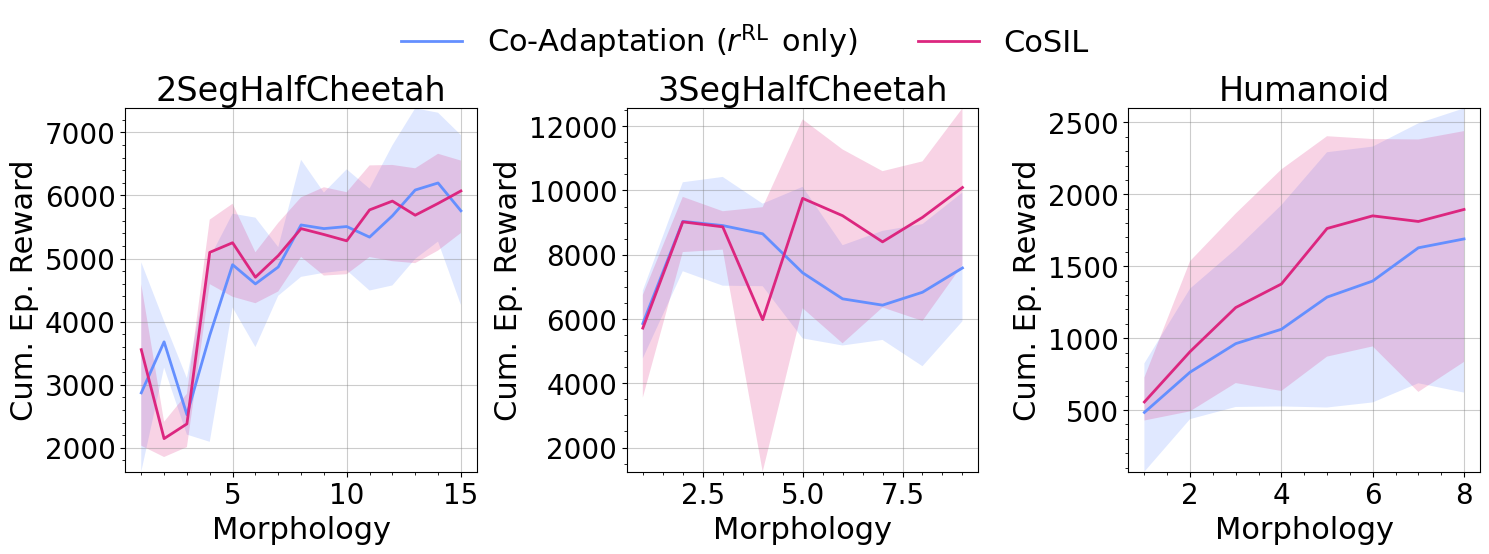

In [ ]:
labels = ["Co-Adaptation ($r^{\operatorname{RL}}$ only)", "CoSIL"]
no_labels = ["_nolegend_", "_nolegend_"]
sizes = [20, 22, 24]
plt.rc('xtick', labelsize=sizes[0])
plt.rc('ytick', labelsize=sizes[0])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) 

plot_dual_comparison(ax1, seghalfcheetah_morph_mean_data, seghalfcheetah_morph_min_data, seghalfcheetah_morph_max_data, colors, labels, x_label="Morphology", sizes=sizes)
ax1.set_title("2SegHalfCheetah", fontsize=sizes[2])

plot_dual_comparison(ax2, halfcheetah_morph_mean_data, halfcheetah_morph_min_data, halfcheetah_morph_max_data, colors, no_labels, x_label="Morphology", sizes=sizes)
ax2.set_title("3SegHalfCheetah", fontsize=sizes[2])

plot_dual_comparison(ax3, humanoid_morph_mean_data, humanoid_morph_min_data, humanoid_morph_max_data, colors, no_labels, x_label="Morphology", sizes=sizes)
ax3.set_title("Humanoid", fontsize=sizes[2])

legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()

fig.savefig("data/plots/baseline_cosil_top30per_comparison.pdf", bbox_inches='tight')

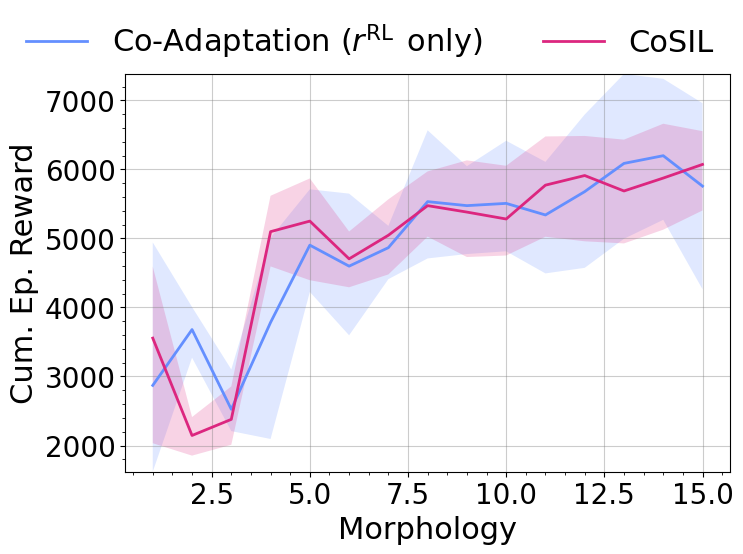

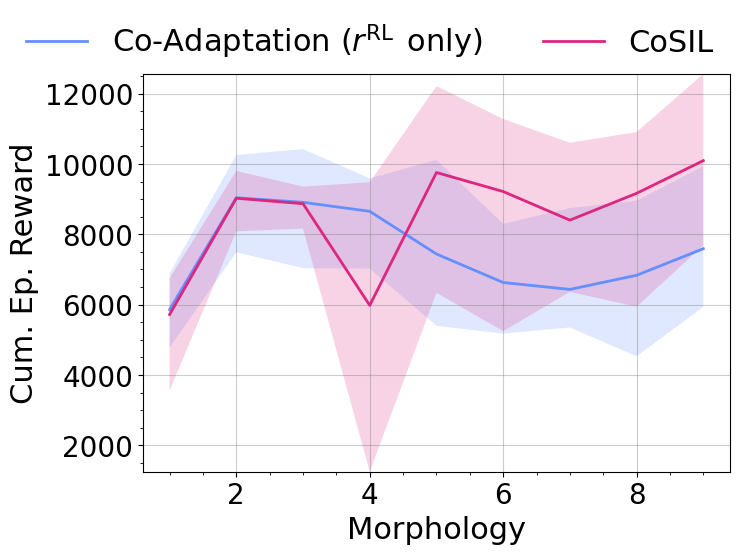

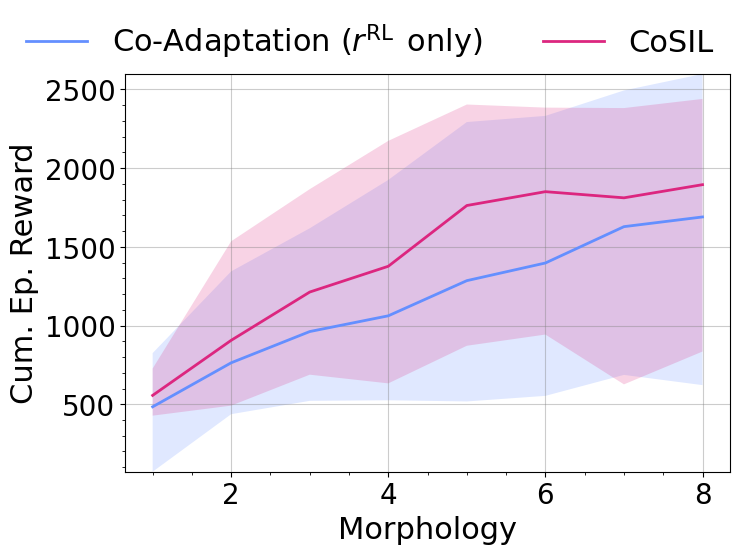

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3)) 
plot_dual_comparison(ax, seghalfcheetah_morph_mean_data, seghalfcheetah_morph_min_data, seghalfcheetah_morph_max_data, colors, labels, x_label="Morphology", sizes=sizes)
#ax.set_title("2SegHalfCheetah", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_top30per_comparison_2seghalfcheetah.pdf", bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3))
plot_dual_comparison(ax, halfcheetah_morph_mean_data, halfcheetah_morph_min_data, halfcheetah_morph_max_data, colors, labels, x_label="Morphology", sizes=sizes)
#ax.set_title("3SegHalfCheetah", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_top30per_comparison_3seghalfcheetah.pdf", bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(7.5, 15/3))
plot_dual_comparison(ax, humanoid_morph_mean_data, humanoid_morph_min_data, humanoid_morph_max_data, colors, labels, x_label="Morphology", sizes=sizes)
#ax.set_title("Humanoid", fontsize=sizes[2])
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()
fig.savefig("data/plots/baseline_cosil_top30per_comparison_humanoid.pdf", bbox_inches='tight')

## Morphology parameters

In [ ]:
envs = [ "humanoid", "halfcheetah", "2seghalfcheetah" ]
methods = [ "baseline", "cosil" ]
n_seeds = 5
n_morphoparams = {
    "humanoid": 4,
    "halfcheetah": 6,
    "2seghalfcheetah": 4,
}

In [ ]:
for env in envs:
    for method in methods:
        method_std = []
        for p in range(n_morphoparams[env]):
            param_std = []
            for s in range(n_seeds):
                file_path = "data/experiments/morphoparams/" + env + "_" + method + "_" + str(p) + "_" + str(s) + ".csv"
                data = np.array(read_file(file_path))
                data = data[:, 1]
                data = np.unique(data, axis=0)
                param_std.append(np.std(data))
            method_std.append(np.mean(param_std))
            print("[ENV] {}, [METHOD] {}, [MORPHO_PARAM] {}, [AVG_STD] {}".format(env, method, p, np.mean(param_std)))
        print("[ENV] {}, [METHOD] {}, [AVG_STD] {}".format(env, method, np.mean(method_std)))

[ENV] humanoid, [METHOD] baseline, [MORPHO_PARAM] 0, [AVG_STD] 0.09799443395799787
[ENV] humanoid, [METHOD] baseline, [MORPHO_PARAM] 1, [AVG_STD] 0.13644699893919693
[ENV] humanoid, [METHOD] baseline, [MORPHO_PARAM] 2, [AVG_STD] 0.0880912829653847
[ENV] humanoid, [METHOD] baseline, [MORPHO_PARAM] 3, [AVG_STD] 0.08628812447368338
[ENV] humanoid, [METHOD] baseline, [AVG_STD] 0.10220521008406572
[ENV] humanoid, [METHOD] cosil, [MORPHO_PARAM] 0, [AVG_STD] 0.1013512058927339
[ENV] humanoid, [METHOD] cosil, [MORPHO_PARAM] 1, [AVG_STD] 0.10608804877439906
[ENV] humanoid, [METHOD] cosil, [MORPHO_PARAM] 2, [AVG_STD] 0.08353511412890688
[ENV] humanoid, [METHOD] cosil, [MORPHO_PARAM] 3, [AVG_STD] 0.09499358462429051
[ENV] humanoid, [METHOD] cosil, [AVG_STD] 0.0964919883550826
[ENV] halfcheetah, [METHOD] baseline, [MORPHO_PARAM] 0, [AVG_STD] 0.0865059930514032
[ENV] halfcheetah, [METHOD] baseline, [MORPHO_PARAM] 1, [AVG_STD] 0.0856206475299113
[ENV] halfcheetah, [METHOD] baseline, [MORPHO_PARAM] 2

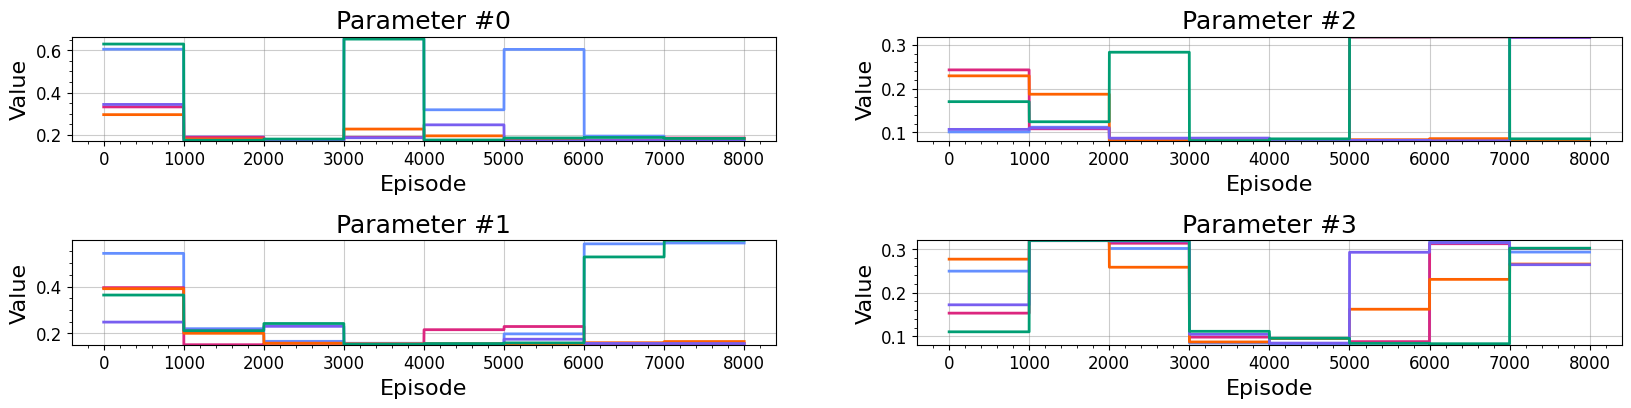

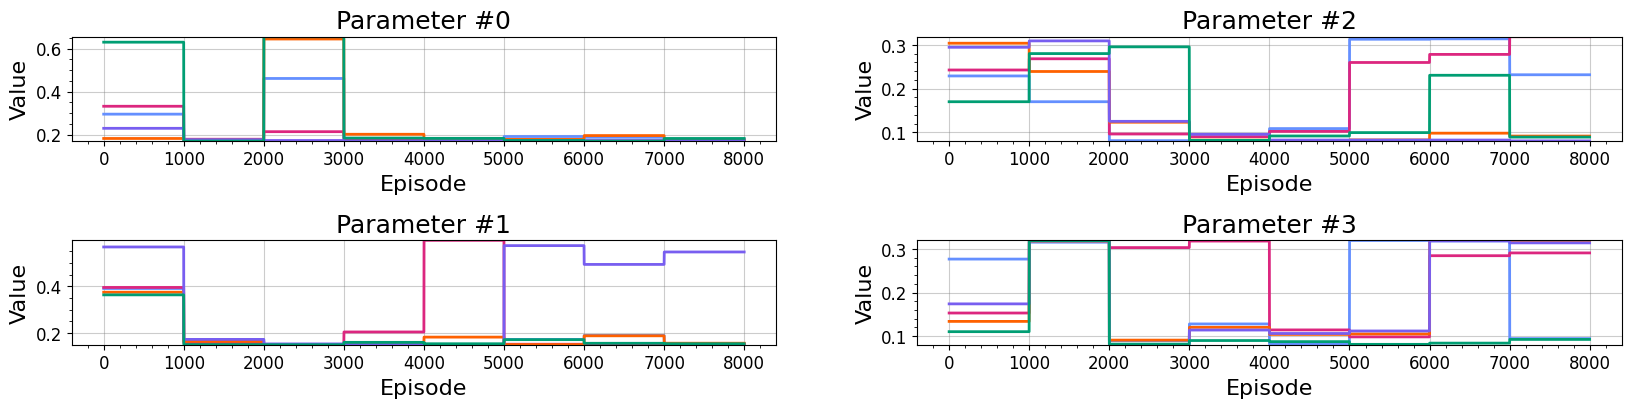

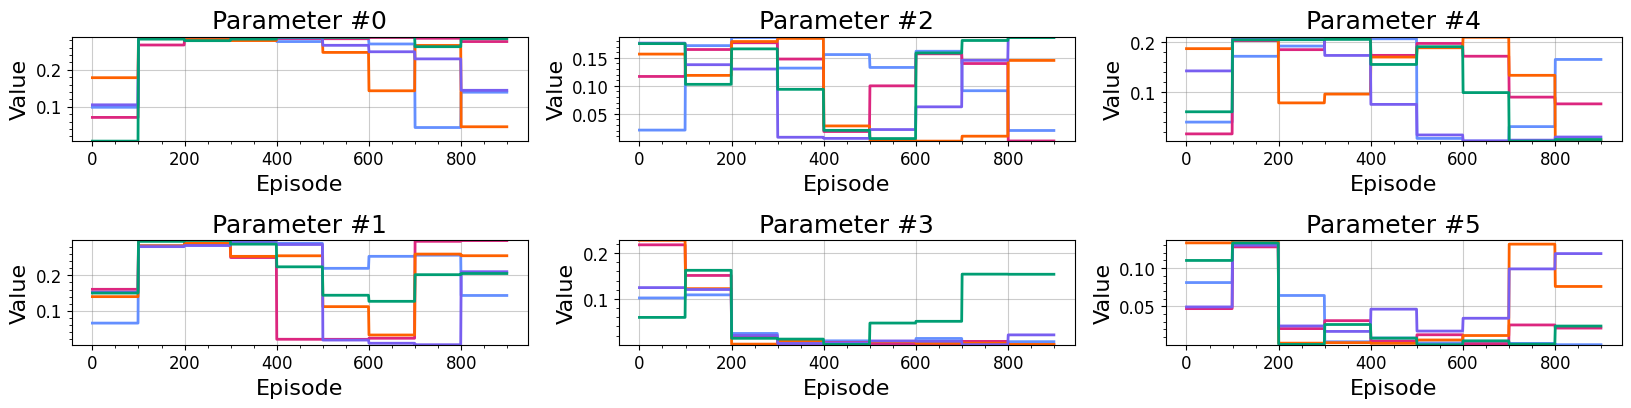

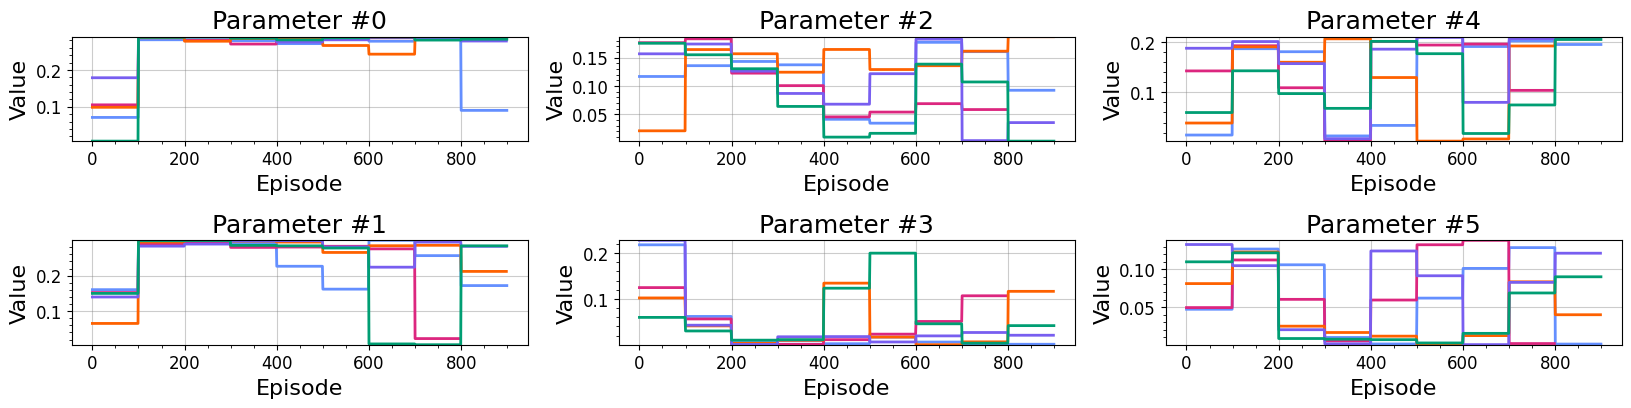

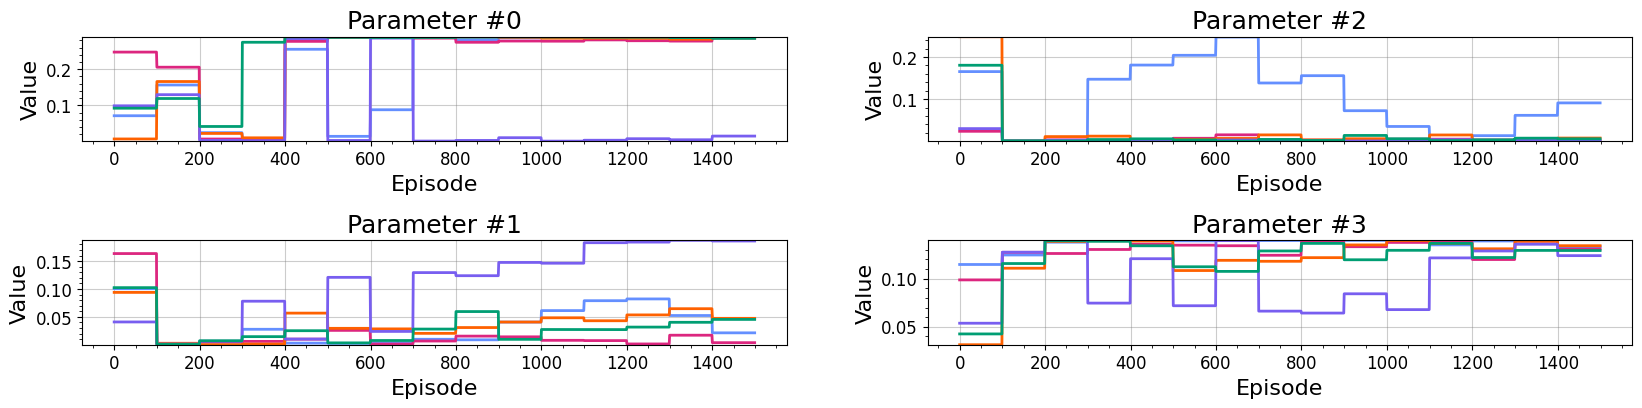

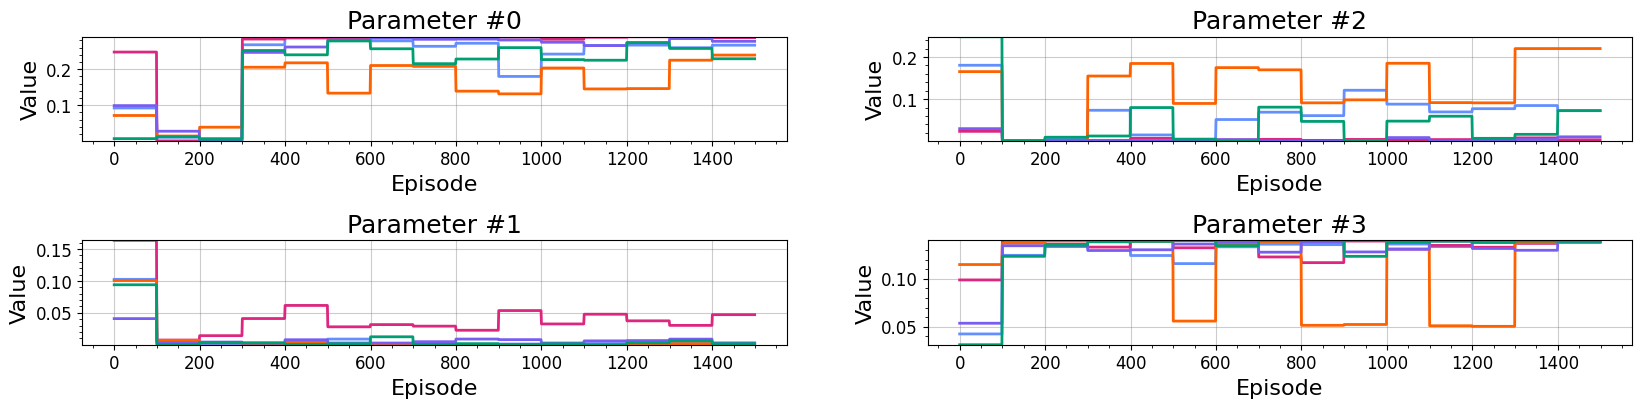

In [ ]:
cutoff_episodes = {
    "humanoid": 8000,
    "halfcheetah": 900,
    "2seghalfcheetah": 1500,

}
ranges = {
    "humanoid": [np.array([0.34, 0.3, 0.16, 0.16]) / 2 - 0.01,
                 np.array([0.34, 0.3, 0.16, 0.16]) * 2 + 0.01],
    "halfcheetah": [np.zeros((6,)) - 0.01,
                    np.array([.145, .15, .094, .133, .106, .07]) * 2 + 0.01],
    "2seghalfcheetah": [np.zeros((4,)) - 0.01,
                        np.array([.145, .094, .133, .07]) * 2 + 0.01],
}

sizes = [12, 16, 18]
plt.rc('xtick', labelsize=sizes[0])
plt.rc('ytick', labelsize=sizes[0])

for env in envs:
    for method in methods:
        fig, axs = plt.subplots(2, n_morphoparams[env] // 2, figsize=(20, 4))
        #fig.suptitle(env + " " + method, fontsize=sizes[2])

        data = np.zeros((n_morphoparams[env], n_seeds))
        
        for p in range(n_morphoparams[env]):
            for s in range(n_seeds):
                file_path = "data/experiments/morphoparams/" + env + "_" + method + "_" + str(p) + "_" + str(s) + ".csv"
                data = np.array(read_file(file_path))
                data = data[:, 1]
                data = data[:cutoff_episodes[env]]

                axs[p % 2, p // 2].plot(data, color=colors[s], linewidth=2.0)
                axs[p % 2, p // 2].set_title("Parameter #" + str(p), fontsize=sizes[2])
                axs[p % 2, p // 2].set_xlabel("Episode", fontsize=sizes[1])
                axs[p % 2, p // 2].set_ylabel("Value", fontsize=sizes[1])
                axs[p % 2, p // 2].set_ylim(ranges[env][0][p], ranges[env][1][p])
                
                set_style(axs[p % 2, p // 2])

        plt.subplots_adjust(hspace=0.95)
        plt.show()
        save_path = "data/plots/morphoparams/" + env + "_" + method + ".pdf"
        fig.savefig(save_path, bbox_inches='tight')

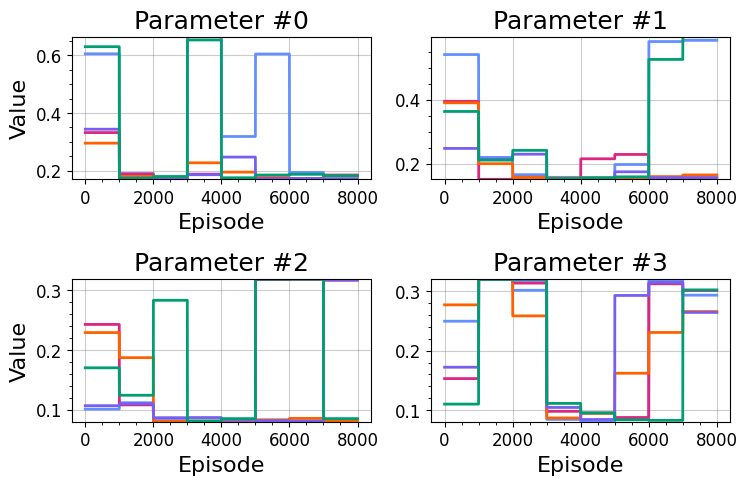

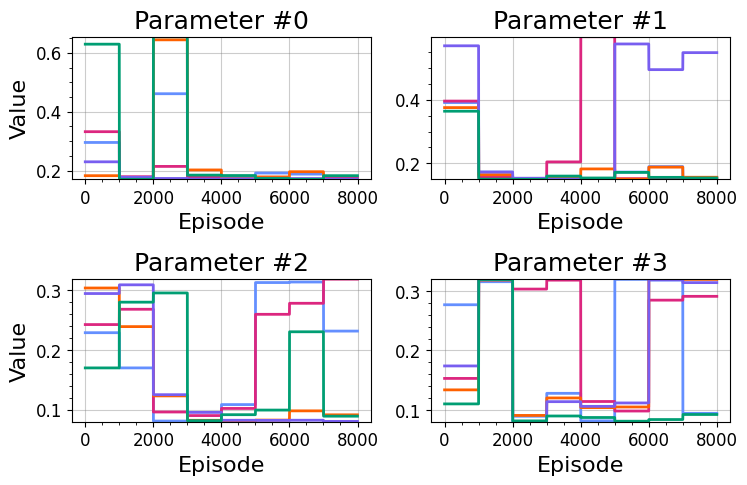

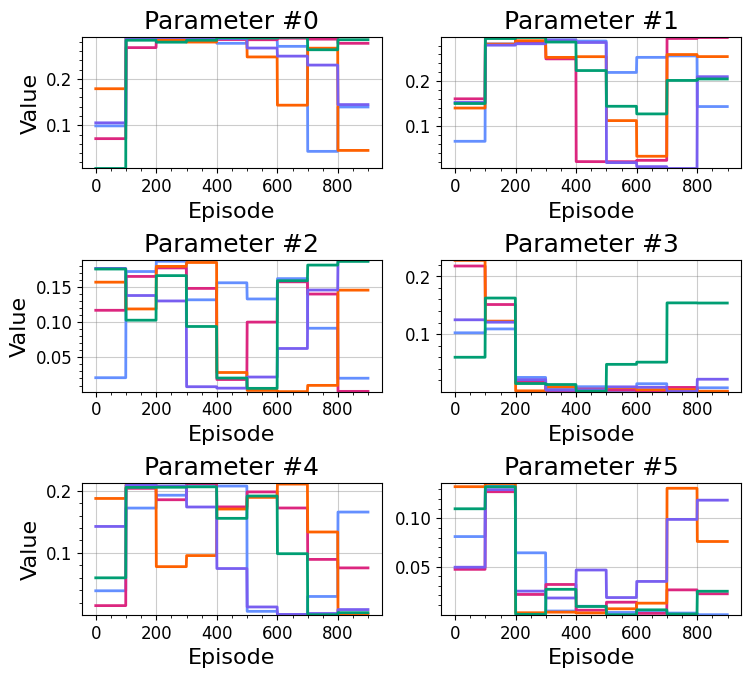

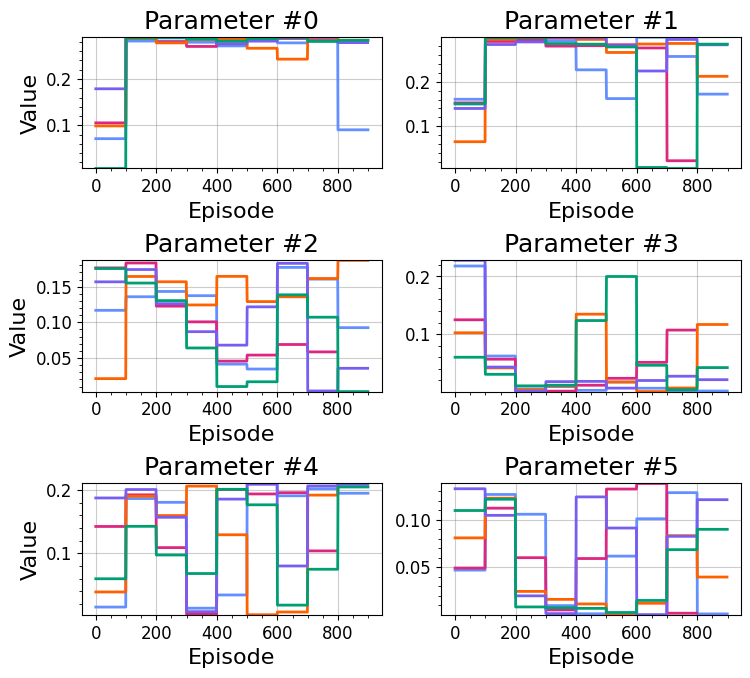

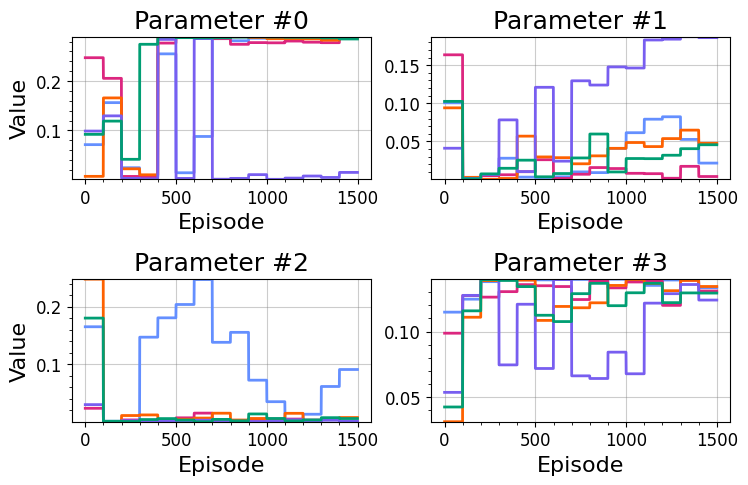

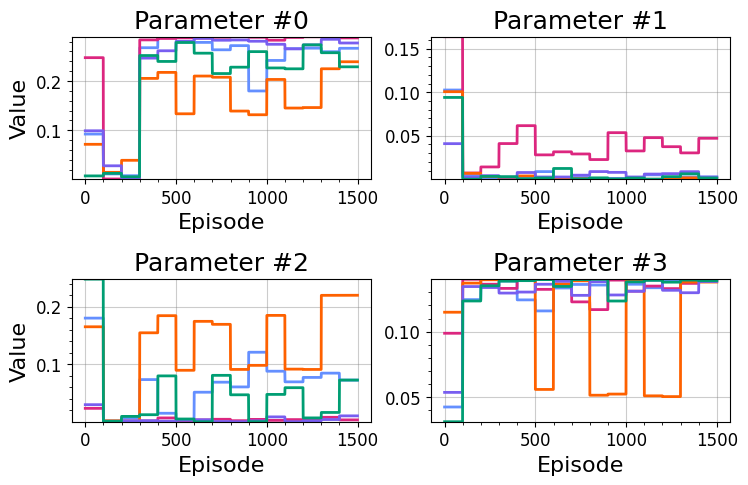

In [ ]:
cutoff_episodes = {
    "humanoid": 8000,
    "halfcheetah": 900,
    "2seghalfcheetah": 1500,

}
ranges = {
    "humanoid": [np.array([0.34, 0.3, 0.16, 0.16]) / 2 - 0.01,
                 np.array([0.34, 0.3, 0.16, 0.16]) * 2 + 0.01],
    "halfcheetah": [np.zeros((6,)) - 0.01,
                    np.array([.145, .15, .094, .133, .106, .07]) * 2 + 0.01],
    "2seghalfcheetah": [np.zeros((4,)) - 0.01,
                        np.array([.145, .094, .133, .07]) * 2 + 0.01],
}

sizes = [12, 16, 18]
plt.rc('xtick', labelsize=sizes[0])
plt.rc('ytick', labelsize=sizes[0])

for env in envs:
    for method in methods:
        fig, axs = plt.subplots(n_morphoparams[env] // 2, 2, figsize=(8.5, (n_morphoparams[env] // 2) * 2.5))
        #fig.suptitle(env + " " + method, fontsize=sizes[2])

        data = np.zeros((n_morphoparams[env], n_seeds))
        
        for p in range(n_morphoparams[env]):
            for s in range(n_seeds):
                file_path = "data/experiments/morphoparams/" + env + "_" + method + "_" + str(p) + "_" + str(s) + ".csv"
                data = np.array(read_file(file_path))
                data = data[:, 1]
                data = data[:cutoff_episodes[env]]

                axs[p // 2, p % 2].plot(data, color=colors[s], linewidth=2.0)
                axs[p // 2, p % 2].set_title("Parameter #" + str(p), fontsize=sizes[2])
                axs[p // 2, p % 2].set_xlabel("Episode", fontsize=sizes[1])
                if p % 2 == 0:
                    axs[p // 2, p % 2].set_ylabel("Value", fontsize=sizes[1])
                axs[p // 2, p % 2].set_ylim(ranges[env][0][p], ranges[env][1][p])
                
                set_style(axs[p // 2, p % 2])

        plt.subplots_adjust(hspace=0.7)
        plt.show()
        save_path = "data/plots/morphoparams/" + env + "_" + method + "_column.pdf"
        fig.savefig(save_path, bbox_inches='tight')

In [ ]:
# Calculate the mean and std (over all seeds) of the change in morphology parameters from one morphology to the next, for each method, environment, and parameter
from matplotlib import table
from numpy import mean
import pandas as pd

df = pd.DataFrame(columns=["Environment", "Parameter", "Method", "Mean \u00B1 std"])
avg_df = pd.DataFrame(columns=["Environment", "Method", "Mean \u00B1 std"])

for env in envs:
    for method in methods:
        changes = []
        changes = []
        for p in range(n_morphoparams[env]):
            param_changes = []
            for s in range(n_seeds):
                file_path = "data/experiments/morphoparams/" + env + "_" + method + "_" + str(p) + "_" + str(s) + ".csv"
                data = np.array(read_file(file_path))
                data = data[:, 1]
                data = data[:cutoff_episodes[env]]
                data = np.unique(data, axis=0)
                diffs = np.abs(data[1:] - data[:-1])
                param_changes.extend(diffs)
                changes.extend(diffs)

            param_changes = np.array(param_changes)
            mean_std = str(np.round(np.mean(param_changes), 4)) + " \u00B1 " + str(np.round(np.std(param_changes), 3))
            df = pd.concat([df, pd.DataFrame([{"Environment": env, "Parameter": p, "Method": method, "Mean \u00B1 std": mean_std}])], ignore_index=True)
        
        mean_std = str(np.round(np.mean(changes), 4)) + " \u00B1 " + str(np.round(np.std(changes), 3))
        avg_df = pd.concat([avg_df, pd.DataFrame([{"Environment": env, "Method": method, "Mean \u00B1 std": mean_std}])], ignore_index=True)

df = df.sort_values(by=["Environment", "Parameter", "Method"])
df = df.reset_index(drop=True)
print(df.to_latex(index=False))

avg_df = avg_df.sort_values(by=["Environment", "Method"])
avg_df = avg_df.reset_index(drop=True)
print(avg_df.to_latex(index=False))


\begin{tabular}{llll}
\toprule
Environment & Parameter & Method & Mean ± std \\
\midrule
2seghalfcheetah & 0 & baseline & 0.0197 ± 0.043 \\
2seghalfcheetah & 0 & cosil & 0.0193 ± 0.044 \\
2seghalfcheetah & 1 & baseline & 0.0092 ± 0.018 \\
2seghalfcheetah & 1 & cosil & 0.007 ± 0.022 \\
2seghalfcheetah & 2 & baseline & 0.0104 ± 0.034 \\
2seghalfcheetah & 2 & cosil & 0.01 ± 0.024 \\
2seghalfcheetah & 3 & baseline & 0.0051 ± 0.013 \\
2seghalfcheetah & 3 & cosil & 0.006 ± 0.017 \\
halfcheetah & 0 & baseline & 0.0293 ± 0.054 \\
halfcheetah & 0 & cosil & 0.0253 ± 0.06 \\
halfcheetah & 1 & baseline & 0.0306 ± 0.039 \\
halfcheetah & 1 & cosil & 0.0281 ± 0.045 \\
halfcheetah & 2 & baseline & 0.0222 ± 0.024 \\
halfcheetah & 2 & cosil & 0.0204 ± 0.019 \\
halfcheetah & 3 & baseline & 0.021 ± 0.037 \\
halfcheetah & 3 & cosil & 0.0231 ± 0.039 \\
halfcheetah & 4 & baseline & 0.0257 ± 0.028 \\
halfcheetah & 4 & cosil & 0.0253 ± 0.032 \\
halfcheetah & 5 & baseline & 0.016 ± 0.023 \\
halfcheetah & 5 & co

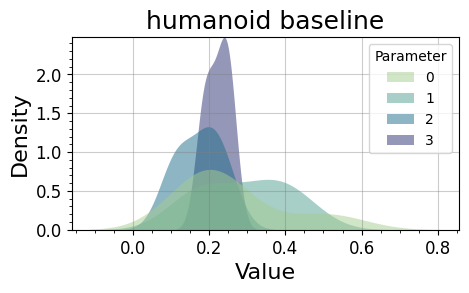

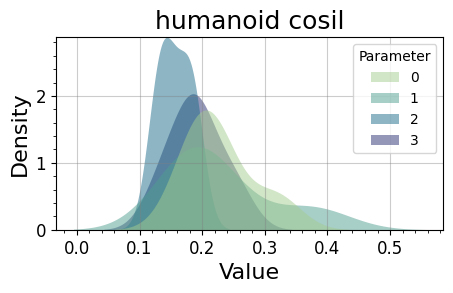

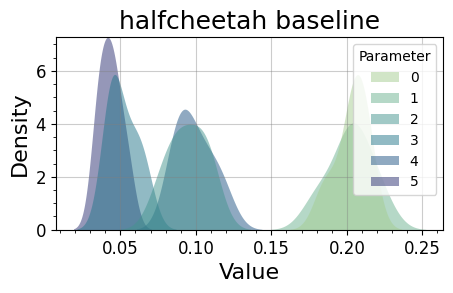

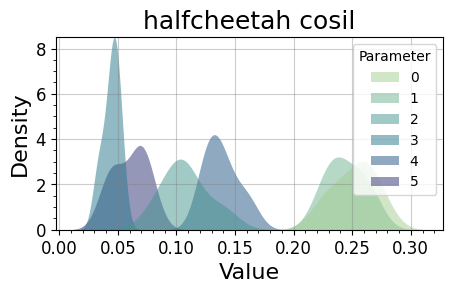

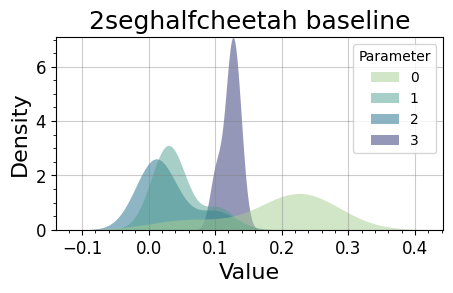

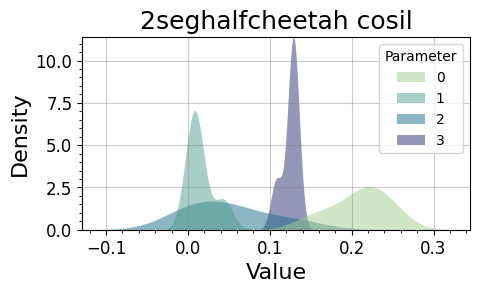

In [ ]:
import seaborn as sns
import pandas as pd

envs = [ "humanoid", "halfcheetah", "2seghalfcheetah" ]
methods = [ "baseline", "cosil" ]
n_seeds = 5
n_morphoparams = {
    "humanoid": 4,
    "halfcheetah": 6,
    "2seghalfcheetah": 4,
}

for env in envs:
    for method in methods:
        data = np.zeros((n_morphoparams[env], n_seeds))
        for p in range(n_morphoparams[env]):
            for s in range(n_seeds):
                file_path = "data/experiments/morphoparams/" + env + "_" + method + "_" + str(p) + "_" + str(s) + ".csv"
                data[p, s] = np.mean(np.array(read_file(file_path))[:, 1])
        data = data.flatten()
        df = pd.DataFrame(data, columns=["Parameter value"])
        df["Parameter"] = np.repeat(np.arange(n_morphoparams[env]), n_seeds)
        df["Seed"] = np.tile(np.arange(n_seeds), n_morphoparams[env])
        df["Method"] = np.repeat(method, n_morphoparams[env] * n_seeds)
        df["Environment"] = np.repeat(env, n_morphoparams[env] * n_seeds)
        df = df.sort_values(by=["Parameter value"])
        fig, ax = plt.subplots(figsize=(5, 2.5))
        sns.kdeplot(data=df, x="Parameter value", hue="Parameter", fill=True, alpha=.5, linewidth=0, palette="crest", ax=ax)
        ax.set_title(env + " " + method, fontsize=sizes[2])
        ax.set_xlabel("Value", fontsize=sizes[1])
        ax.set_ylabel("Density", fontsize=sizes[1])
        set_style(ax)
        plt.show()
        save_path = "data/plots/morphoparams_density/" + env + "_" + method + ".pdf"
        fig.savefig(save_path, bbox_inches='tight')

## Ablation plots

In [ ]:
humanoid_abl_path = "data/experiments/humanoid_om00-oma02.csv"
humanoid_abl_data = np.array(read_file(humanoid_abl_path))
humanoid_abl_data = humanoid_abl_data[:humanoid_cutoff_episode]
humanoid_mean_data = np.array(
    [smooth_fn(humanoid_abl_data[:, 1], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 4], **humanoid_smooth_args)]
)
humanoid_min_data = np.array(
    [smooth_fn(humanoid_abl_data[:, 2], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 5], **humanoid_smooth_args)]
)
humanoid_max_data = np.array(
    [smooth_fn(humanoid_abl_data[:, 3], **humanoid_smooth_args), smooth_fn(humanoid_data[:, 6], **humanoid_smooth_args)]
)

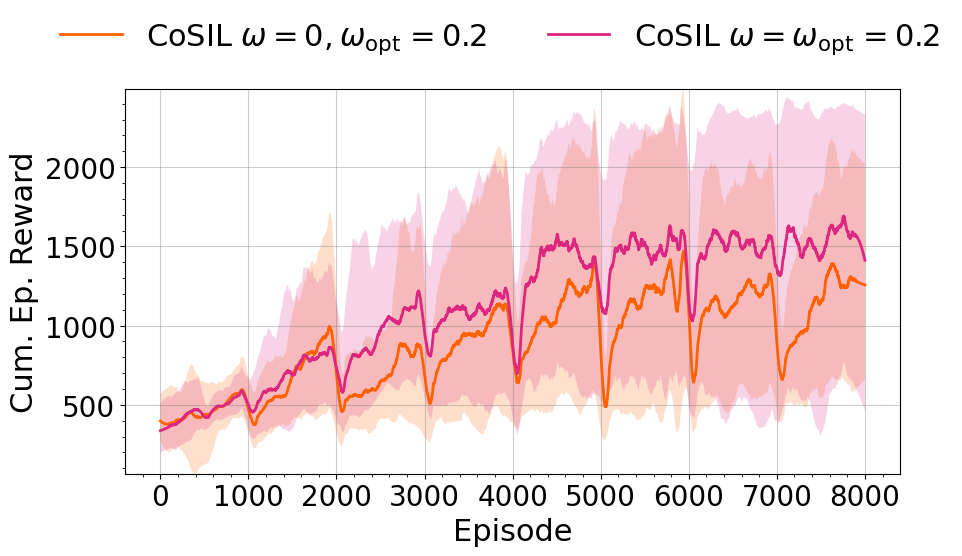

In [ ]:
labels = ["CoSIL $\omega = 0, \omega_{\operatorname{opt}} = 0.2$", "CoSIL $\omega = \omega_{\operatorname{opt}} = 0.2$"]
sizes = [20, 22, 24]
plt.rc('xtick', labelsize=sizes[0])
plt.rc('ytick', labelsize=sizes[0])

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 

plot_dual_comparison(ax, humanoid_mean_data, humanoid_min_data, humanoid_max_data, [colors[2], colors[1]], labels, sizes=sizes)

legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

plt.show()

fig.savefig("data/plots/cosil_ablation.pdf", bbox_inches='tight')

## Hyperparameter plots

In [ ]:
halfcheetah_01_path = "data/experiments/halfcheetah_om01.csv"
halfcheetah_01_data = np.array(read_file(halfcheetah_01_path))
halfcheetah_01_data = halfcheetah_01_data[:halfcheetah_cutoff_episode]

halfcheetah_03_path = "data/experiments/halfcheetah_om03.csv"
halfcheetah_03_data = np.array(read_file(halfcheetah_03_path))
halfcheetah_03_data = halfcheetah_03_data[:halfcheetah_cutoff_episode]

mean_data = np.array(
    [smooth_fn(halfcheetah_01_data[:, 1], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 4], **halfcheetah_smooth_args), smooth_fn(halfcheetah_03_data[:, 1], **halfcheetah_smooth_args)]
)
min_data = np.array(
    [smooth_fn(halfcheetah_01_data[:, 2], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 5], **halfcheetah_smooth_args), smooth_fn(halfcheetah_03_data[:, 2], **halfcheetah_smooth_args)]
)
max_data = np.array(
    [smooth_fn(halfcheetah_01_data[:, 3], **halfcheetah_smooth_args), smooth_fn(halfcheetah_data[:, 6], **halfcheetah_smooth_args), smooth_fn(halfcheetah_03_data[:, 3], **halfcheetah_smooth_args)]
)

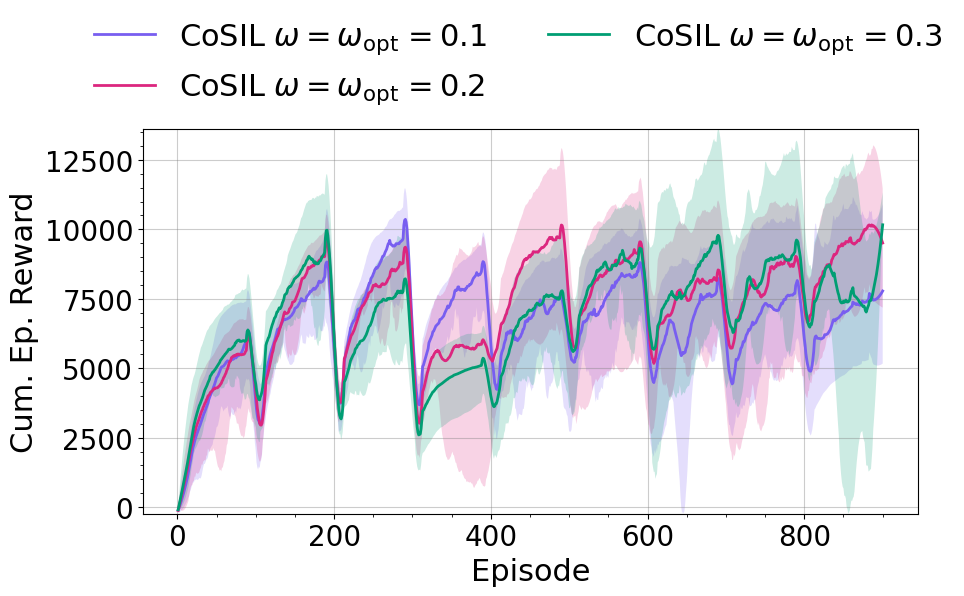

In [ ]:
labels = ["CoSIL $\omega = \omega_{\operatorname{opt}} = 0.1$", "CoSIL $\omega = \omega_{\operatorname{opt}} = 0.2$", "CoSIL $\omega = \omega_{\operatorname{opt}} = 0.3$"]
sizes = [20, 22, 24]
plt.rc('xtick', labelsize=sizes[0])
plt.rc('ytick', labelsize=sizes[0])

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 

plot_dual_comparison(ax, mean_data, min_data, max_data, [colors[3], colors[1], colors[4]], labels, sizes=sizes)

legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          frameon=1, ncol=2, fancybox=True, shadow=False, fontsize=sizes[1])
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

plt.show()

fig.savefig("data/plots/cosil_omega.pdf", bbox_inches='tight')